### NLP (Nature Language Preprocessing)
- collect data (수집)
- cleaning & tokenization (정제 및 토큰화)
- nomalization (불용어/구두점 제거)
- 단어 사전
- vectorization (벡터화)

In [203]:
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize
# tokenization
from nltk.corpus import stopwords
import string

- data 준비
---

In [204]:
TEXT_FILe_1 = '../data/wiki_1.txt'
TEXT_FILe_2 = '../data/wiki_2.txt'
TEXT_FILe_3 = '../data/wiki_3.txt'
TEXT_FILe_4 = '../data/wiki_4.txt'

In [205]:
# data extraction in file
# mode: 'rt' 읽기 기본 모드
with open(TEXT_FILe_1, mode='rt', encoding='utf-8') as f:
    text_data_100 = f.read(100)
    f.seek(0)   # 지정된 숫자만큼 이동해서 읽음
    text_data = f.read()    # 기본은 전체 데이터를 읽음. 데이터 지정하면 그만큼 읽음.
    

In [206]:
len(text_data_100), len(text_data)  # 용량이 줄어듦 --> 피클 이지미 파일을 읽을 때와 동일!!!

(100, 7779)

In [207]:
# data extraction in file
# mode: 'rt' 읽기 기본 모드
# line 단위로 읽음 -> readline() '\n'을 인식
with open(TEXT_FILe_2, mode='rt', encoding='utf-8') as f:
    all_data = []
    while True:
        text_data = f.readline()    # 한줄을 읽고 끝, 무한 반복으로 전체를 읽음
        
        if not text_data:
            break
        else:
            all_data.append(text_data)

In [208]:
len(text_data), text_data

(0, '')

In [209]:
print(f"data len: {len(all_data)}")
print(f"data:\n{all_data[49]}")

data len: 356
data:
Sir Henry Tichborne, the seventh baronet, was travelling through Verdun, France, when the Peace of Amiens broke down in May 1803, reigniting the Napoleonic Wars. As an enemy citizen, he was detained by the French authorities, who held him in captivity as a civil prisoner for some years.[4] He shared his captivity with his fourth son, James, and a nobly born Englishman, Henry Seymour of Knoyle. During his confinement, Seymour managed to conduct an affair with the daughter of the Duc de Bourbon, which produced a daughter, Henriette Felicité, born in about 1807. Years later, when Henriette had passed her 20th birthday and remained unmarried, Seymour thought his former companion James Tichborne might make a suitable husband—although James was close to his own age and was physically unprepossessing. The couple were married in August 1827; on 5 January 1829 Henriette gave birth to a son, Roger Charles Doughty Tichborne.[5]



In [210]:
# data extraction in file
# mode: 'rt' 읽기 기본 모드
# line 단위로 전체 읽기 -> readlines()
with open(TEXT_FILe_3, mode='rt', encoding='utf-8') as f:
    text_data = f.readlines()
    

In [211]:
len(text_data), text_data[0][0:30]

(356, 'Tichborne case\n')

In [212]:
for text in text_data:
    print(text)

Tichborne case



Article

Talk

Read

View source

View history



Tools

Appearance hide

Text



Small



Standard



Large

Width



Standard



Wide

Color (beta)



Automatic



Light



Dark

Featured article

Page semi-protected

From Wikipedia, the free encyclopedia

"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).



The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]

The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.



Roger Tichborne, heir to the family's title and fortunes, was p

- data preprocessing
---

- '\n' delete

In [213]:
# '\n' deleta
all_text = []
for text in text_data:
    text = text.replace('\n', '')
    if len(text):
        all_text.append(text)
        
print(len(all_text), all_text, sep='\n')

280
['Tichborne case', 'Article', 'Talk', 'Read', 'View source', 'View history', 'Tools', 'Appearance hide', 'Text', 'Small', 'Standard', 'Large', 'Width', 'Standard', 'Wide', 'Color (beta)', 'Automatic', 'Light', 'Dark', 'Featured article', 'Page semi-protected', 'From Wikipedia, the free encyclopedia', '"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.', "Roger Tichborne, heir to the fa

- 대/소문자 통일: in english space? area?

In [214]:
all_text = [text.lower() for text in all_text]  # ()를 사용하면 type이 generater가 됨. 양이 많을때, 읽으려면 반복문을 사용, 포인터가 이동함
all_text                                        # generater 사용시 주의를 하기 바람.

['tichborne case',
 'article',
 'talk',
 'read',
 'view source',
 'view history',
 'tools',
 'appearance hide',
 'text',
 'small',
 'standard',
 'large',
 'width',
 'standard',
 'wide',
 'color (beta)',
 'automatic',
 'light',
 'dark',
 'featured article',
 'page semi-protected',
 'from wikipedia, the free encyclopedia',
 '"the tichborne claimant" redirects here. for the 1998 film, see the tichborne claimant (film).',
 "the blended image (centre) was said by the claimant's supporters to prove that roger tichborne (left, in 1853) and the claimant (right, in 1874) were one and the same person.[n 1]",
 'the tichborne case was a legal cause célèbre that fascinated victorian britain in the 1860s and 1870s. it concerned the claims by a man sometimes referred to as thomas castro or as arthur orton, but usually termed "the claimant", to be the missing heir to the tichborne baronetcy. he failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.',
 "roger tich

- tokenizaton

In [215]:
# 구두점 제거를 for 문을 이용할 수도 있고 nltk 모듈을 이용할 수 있음
tokens = []
for text in all_text:
    # tokens.extend(wordpunct_tokenize(text))
    tokens.append(wordpunct_tokenize(text))
    

In [216]:
print(f"len tokens: {len(tokens)}")
print(f"tokens[:10]\n{tokens[:10]}")

len tokens: 280
tokens[:10]
[['tichborne', 'case'], ['article'], ['talk'], ['read'], ['view', 'source'], ['view', 'history'], ['tools'], ['appearance', 'hide'], ['text'], ['small']]


- stopwords & punctuation delete

In [217]:
english_stopwords = stopwords.words('english')
punct = list(string.punctuation)

english_stopwords.extend(['".[', ').[', '.).', '...', '),[',')".'])


In [218]:
for token_list in tokens:
    for token in token_list[::-1]:
        for i in token:
            if i in punct:
                token.replace(i, '')
        if token.isnumeric():
            token_list.remove(token)
        elif (token in english_stopwords) or (token in punct) or (len(token)<=2):
            token_list.remove(token)
        
        
        
# for pun in punct:
#     # print(f"punctuation: {pun}")
#     tokens = tokens.replace(pun, ' ')
        
# '".['], 제거하려면 정규식 or 반복문
# for token in tokens[::-1]:
#     if (token in english_stopwords) or (token in punct) or (len(token)<=2):
#             tokens.remove(token)
            

len(tokens)

280

In [219]:
tokens

[['tichborne', 'case'],
 ['article'],
 ['talk'],
 ['read'],
 ['view', 'source'],
 ['view', 'history'],
 ['tools'],
 ['appearance', 'hide'],
 ['text'],
 ['small'],
 ['standard'],
 ['large'],
 ['width'],
 ['standard'],
 ['wide'],
 ['color', 'beta'],
 ['automatic'],
 ['light'],
 ['dark'],
 ['featured', 'article'],
 ['page', 'semi', 'protected'],
 ['wikipedia', 'free', 'encyclopedia'],
 ['tichborne',
  'claimant',
  'redirects',
  'film',
  'see',
  'tichborne',
  'claimant',
  'film'],
 ['blended',
  'image',
  'centre',
  'said',
  'claimant',
  'supporters',
  'prove',
  'roger',
  'tichborne',
  'left',
  'claimant',
  'right',
  'one',
  'person'],
 ['tichborne',
  'case',
  'legal',
  'cause',
  'célèbre',
  'fascinated',
  'victorian',
  'britain',
  '1860s',
  '1870s',
  'concerned',
  'claims',
  'man',
  'sometimes',
  'referred',
  'thomas',
  'castro',
  'arthur',
  'orton',
  'usually',
  'termed',
  'claimant',
  'missing',
  'heir',
  'tichborne',
  'baronetcy',
  'failed',


- 단어별 빈도수 계산

In [220]:
# token을 key로 빈도수 저장
token_freq = {}

# lien 별로 token을 읽어서 빈도 체크
for token_list in tokens:
    for token in token_list:
        if token not in token_freq:
            token_freq[token] = 0   # 없으면 0
        token_freq[token] += 1  # 아니면 추가
        
len(token_freq)

1882

In [221]:
token_freq

{'tichborne': 113,
 'case': 31,
 'article': 3,
 'talk': 1,
 'read': 1,
 'view': 3,
 'source': 2,
 'history': 6,
 'tools': 1,
 'appearance': 1,
 'hide': 1,
 'text': 2,
 'small': 6,
 'standard': 3,
 'large': 3,
 'width': 1,
 'wide': 2,
 'color': 1,
 'beta': 1,
 'automatic': 1,
 'light': 2,
 'dark': 1,
 'featured': 2,
 'page': 2,
 'semi': 1,
 'protected': 1,
 'wikipedia': 2,
 'free': 1,
 'encyclopedia': 1,
 'claimant': 130,
 'redirects': 1,
 'film': 5,
 'see': 2,
 'blended': 1,
 'image': 1,
 'centre': 2,
 'said': 5,
 'supporters': 8,
 'prove': 2,
 'roger': 64,
 'left': 7,
 'right': 2,
 'one': 13,
 'person': 2,
 'legal': 14,
 'cause': 3,
 'célèbre': 1,
 'fascinated': 1,
 'victorian': 4,
 'britain': 4,
 '1860s': 1,
 '1870s': 1,
 'concerned': 2,
 'claims': 2,
 'man': 5,
 'sometimes': 4,
 'referred': 2,
 'thomas': 10,
 'castro': 17,
 'arthur': 23,
 'orton': 42,
 'usually': 1,
 'termed': 1,
 'missing': 5,
 'heir': 4,
 'baronetcy': 5,
 'failed': 5,
 'convince': 3,
 'courts': 6,
 'convicted': 3,

In [222]:
# 빈도별로 몇 개의 단어가 존대하는지 알고 싶음
token_freq.items()

dict_items([('tichborne', 113), ('case', 31), ('article', 3), ('talk', 1), ('read', 1), ('view', 3), ('source', 2), ('history', 6), ('tools', 1), ('appearance', 1), ('hide', 1), ('text', 2), ('small', 6), ('standard', 3), ('large', 3), ('width', 1), ('wide', 2), ('color', 1), ('beta', 1), ('automatic', 1), ('light', 2), ('dark', 1), ('featured', 2), ('page', 2), ('semi', 1), ('protected', 1), ('wikipedia', 2), ('free', 1), ('encyclopedia', 1), ('claimant', 130), ('redirects', 1), ('film', 5), ('see', 2), ('blended', 1), ('image', 1), ('centre', 2), ('said', 5), ('supporters', 8), ('prove', 2), ('roger', 64), ('left', 7), ('right', 2), ('one', 13), ('person', 2), ('legal', 14), ('cause', 3), ('célèbre', 1), ('fascinated', 1), ('victorian', 4), ('britain', 4), ('1860s', 1), ('1870s', 1), ('concerned', 2), ('claims', 2), ('man', 5), ('sometimes', 4), ('referred', 2), ('thomas', 10), ('castro', 17), ('arthur', 23), ('orton', 42), ('usually', 1), ('termed', 1), ('missing', 5), ('heir', 4), 

In [223]:
{value:key for key, value in token_freq.items()}    # key 값이 중복이 일어나기 때문에 마지막 값만 들어감.

{113: 'tichborne',
 31: 'case',
 3: 'oclc',
 1: 'organization',
 2: 'wikimedia',
 6: 'isbn',
 130: 'claimant',
 5: 'mystery',
 8: 'library',
 64: 'roger',
 7: 'doi',
 13: 'annear',
 14: 'would',
 4: 'cresswell',
 10: 'retrieved',
 17: 'london',
 23: 'kenealy',
 42: 'orton',
 32: 'family',
 11: 'cockburn',
 16: 'wagga',
 19: 'may',
 20: 'court',
 18: 'years',
 12: 'april',
 26: 'sir',
 9: 'morse',
 15: 'name',
 52: 'mcwilliam',
 62: 'woodruff'}

In [224]:
# 빈도별로 단어또는 단어의 개수 저장
freq_dict = {}
for key, value in token_freq.items():
    if value not in freq_dict:
        freq_dict[value] = [1, [key]]
    else:
        freq_dict[value][1].append(key)
        freq_dict[value][0] += 1

In [225]:
freq_dict

{113: [1, ['tichborne']],
 31: [1, ['case']],
 3: [147,
  ['article',
   'view',
   'standard',
   'large',
   'cause',
   'convince',
   'convicted',
   'served',
   'prison',
   'presumed',
   'hearing',
   'australian',
   'newspapers',
   'reward',
   'bearing',
   'sought',
   'enquiries',
   'throughout',
   'radical',
   'parliament',
   'confessed',
   'almost',
   'destitute',
   'tichbornes',
   'near',
   'hampshire',
   'old',
   'prominent',
   'century',
   'france',
   'affair',
   'make',
   'couple',
   'married',
   'august',
   'seven',
   'younger',
   'childhood',
   'three',
   'children',
   'placed',
   'stonyhurst',
   'stayed',
   'cousin',
   'four',
   'wife',
   'young',
   'continued',
   'private',
   'visited',
   'back',
   'jamaica',
   'fate',
   'together',
   'another',
   'picked',
   'alive',
   'whose',
   'well',
   'newspaper',
   'times',
   'agreed',
   'shop',
   'october',
   'lawyer',
   'local',
   'using',
   'funds',
   'non',
   'moved

In [226]:
total_num = len(token_freq)
total_num

1882

In [227]:
sorted(freq_dict.items(), reverse=True) # 지금은 위키피디아 뉴스 데이터, 단어의 빈도를 보고 싶으는 것은  관련된 기사의 다른 자료를 보면서 결정.

[(130, [1, ['claimant']]),
 (113, [1, ['tichborne']]),
 (64, [1, ['roger']]),
 (62, [1, ['woodruff']]),
 (52, [1, ['mcwilliam']]),
 (42, [1, ['orton']]),
 (32, [1, ['family']]),
 (31, [1, ['case']]),
 (26, [1, ['sir']]),
 (23, [2, ['arthur', 'kenealy']]),
 (20, [1, ['court']]),
 (19, [4, ['lady', 'son', 'trial', 'may']]),
 (18, [1, ['years']]),
 (17, [4, ['castro', 'australia', 'england', 'london']]),
 (16, [1, ['wagga']]),
 (15, [2, ['doughty', 'name']]),
 (14, [3, ['legal', 'although', 'would']]),
 (13, [6, ['one', 'james', 'henry', 'evidence', 'oxford', 'annear']]),
 (12, [4, ['edward', 'former', 'john', 'april']]),
 (11,
  [7,
   ['died',
    'information',
    'civil',
    'bogle',
    'witnesses',
    'public',
    'cockburn']]),
 (10, [6, ['thomas', 'support', 'accepted', 'became', 'press', 'retrieved']]),
 (9,
  [11,
   ['later',
    'first',
    'march',
    'ship',
    'lost',
    'including',
    'could',
    'ballantine',
    'hawkins',
    'required',
    'morse']]),
 (8,


- 단어 사전
---
- 단어: 숫자 매핑
- 나의 데이터셋을 숫자로 변환하기 위한 encoding
    - 나의 단어 사전에 없는 단어는 어떤 숫자로 표현?
    - 문장을 처리하니까 길이가 달라짐.
    - 데이터 크기를 맞춰서 넣던가 다른 방법은 모름. padding하는 것처럼 채운다?
    - padding은 0으로 넣어줌. 크기와 길이를 맞추기 위함.
    - padding에 사용하는 token이 필요 --> 'PAD'키, 값 0
- 테스트 또는 검증에 입력되는 텍스트 ==> 단어사전에 존재하지 않는 단어
    - 존재하지 않는 토큰'oov' 또는 'UNK' 키, 값 1
- 변역을 하는 경우에는 번역하는 언어가 2개니까 2개의 custom 단어사전 정의가 필요함. 그외의 패키지도 더 다운 받아야함.
- 

- 대체 뭘 필기하고 싶었던 걸까?

In [228]:
# 빈도가 높게 나오는대로 정렬
sorted_token_list = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)
sorted_token_list

[('claimant', 130),
 ('tichborne', 113),
 ('roger', 64),
 ('woodruff', 62),
 ('mcwilliam', 52),
 ('orton', 42),
 ('family', 32),
 ('case', 31),
 ('sir', 26),
 ('arthur', 23),
 ('kenealy', 23),
 ('court', 20),
 ('lady', 19),
 ('son', 19),
 ('trial', 19),
 ('may', 19),
 ('years', 18),
 ('castro', 17),
 ('australia', 17),
 ('england', 17),
 ('london', 17),
 ('wagga', 16),
 ('doughty', 15),
 ('name', 15),
 ('legal', 14),
 ('although', 14),
 ('would', 14),
 ('one', 13),
 ('james', 13),
 ('henry', 13),
 ('evidence', 13),
 ('oxford', 13),
 ('annear', 13),
 ('edward', 12),
 ('former', 12),
 ('john', 12),
 ('april', 12),
 ('died', 11),
 ('information', 11),
 ('civil', 11),
 ('bogle', 11),
 ('witnesses', 11),
 ('public', 11),
 ('cockburn', 11),
 ('thomas', 10),
 ('support', 10),
 ('accepted', 10),
 ('became', 10),
 ('press', 10),
 ('retrieved', 10),
 ('later', 9),
 ('first', 9),
 ('march', 9),
 ('ship', 9),
 ('lost', 9),
 ('including', 9),
 ('could', 9),
 ('ballantine', 9),
 ('hawkins', 9),
 ('r

In [229]:
# 단어 사전 생성 및 초기화
# 특수 토큰: 'PAD', 'OOV', 'UNK'
PAD_TOKEN, OOV_TOKEN = 'PAD', 'OOV'

vocab = {PAD_TOKEN:0, OOV_TOKEN:1}

In [230]:
for idx, tk in enumerate(sorted_token_list, 2):
    vocab[tk[0]] = idx
    
print(vocab)
    

{'PAD': 0, 'OOV': 1, 'claimant': 2, 'tichborne': 3, 'roger': 4, 'woodruff': 5, 'mcwilliam': 6, 'orton': 7, 'family': 8, 'case': 9, 'sir': 10, 'arthur': 11, 'kenealy': 12, 'court': 13, 'lady': 14, 'son': 15, 'trial': 16, 'may': 17, 'years': 18, 'castro': 19, 'australia': 20, 'england': 21, 'london': 22, 'wagga': 23, 'doughty': 24, 'name': 25, 'legal': 26, 'although': 27, 'would': 28, 'one': 29, 'james': 30, 'henry': 31, 'evidence': 32, 'oxford': 33, 'annear': 34, 'edward': 35, 'former': 36, 'john': 37, 'april': 38, 'died': 39, 'information': 40, 'civil': 41, 'bogle': 42, 'witnesses': 43, 'public': 44, 'cockburn': 45, 'thomas': 46, 'support': 47, 'accepted': 48, 'became': 49, 'press': 50, 'retrieved': 51, 'later': 52, 'first': 53, 'march': 54, 'ship': 55, 'lost': 56, 'including': 57, 'could': 58, 'ballantine': 59, 'hawkins': 60, 'required': 61, 'morse': 62, 'supporters': 63, 'details': 64, 'wapping': 65, 'time': 66, 'identity': 67, 'remained': 68, 'baronet': 69, 'two': 70, 'june': 71, 's

- 이미지에서 특징을 추출하듯이 특정 단어들을 추출하면 문장의 특성을 파악할 수 있음.
- 그래서 의미없는 단어들을 버림. 학습해야 할 단어가 많아지기 때문에. 전처리도 오래걸리는데 더 오래 걸릴 수는 없엉.
- 특수기호나 숫자들 또한 의미가 없다면 버려야 함. 그런 의미에서 지금 데이터는 의미없는 특수 문자들이 걸러지지 못했음.
    - 연속적인 특수기호의 제거는 for문을 하나더 써야 할듯. 아니면 tokenization 하기 전에 제거를 하거나...
- 

- Vetorization (벡터화)
---
- 단어를 수치로 변환하는 과정
- 종류
    - 정수인코딩(integer encoding)
    - 원핫인코딩(one-hot encoding)
    - 단어분리
- 아래서 작업한 것이 벡터화가 아니다??? 그냥 labeling을 한 것이다???????

In [231]:
all_data[0], all_text[0]

('Tichborne case\n', 'tichborne case')

In [232]:
# text 문장을 encoding
encoding_data = []
for token_list in tokens:
    sent = []
    print(f"문장: {token_list}")
    
    for token in token_list:
        sent.append(vocab[token])
    
    print(f"==> 인코딩: {sent}")
    encoding_data.append(sent)
    
len(encoding_data)

문장: ['tichborne', 'case']
==> 인코딩: [3, 9]
문장: ['article']
==> 인코딩: [258]
문장: ['talk']
==> 인코딩: [720]
문장: ['read']
==> 인코딩: [721]
문장: ['view', 'source']
==> 인코딩: [259, 405]
문장: ['view', 'history']
==> 인코딩: [259, 101]
문장: ['tools']
==> 인코딩: [722]
문장: ['appearance', 'hide']
==> 인코딩: [723, 724]
문장: ['text']
==> 인코딩: [406]
문장: ['small']
==> 인코딩: [102]
문장: ['standard']
==> 인코딩: [260]
문장: ['large']
==> 인코딩: [261]
문장: ['width']
==> 인코딩: [725]
문장: ['standard']
==> 인코딩: [260]
문장: ['wide']
==> 인코딩: [407]
문장: ['color', 'beta']
==> 인코딩: [726, 727]
문장: ['automatic']
==> 인코딩: [728]
문장: ['light']
==> 인코딩: [408]
문장: ['dark']
==> 인코딩: [729]
문장: ['featured', 'article']
==> 인코딩: [409, 258]
문장: ['page', 'semi', 'protected']
==> 인코딩: [410, 730, 731]
문장: ['wikipedia', 'free', 'encyclopedia']
==> 인코딩: [411, 732, 733]
문장: ['tichborne', 'claimant', 'redirects', 'film', 'see', 'tichborne', 'claimant', 'film']
==> 인코딩: [3, 2, 734, 133, 412, 3, 2, 133]
문장: ['blended', 'image', 'centre', 'said', 'claimant', 'suppor

280

- Padding
---
- 모든 문장 길이 일치
- 기준: 선택은 개발자의 몫, 케바케
    - 가장 긴 문장: 우리말은 끝까지 들어봐야 안다.
    - 가장 짧은 문장: 신조어? 다 짧게 쓰니까? 예를 잘 모르겠음.
    - 가장 많은 빈도의 길이로 일치: 또는 평균 길이로도 맞출 수 있지
- 자르는 방법도 앞을 날리는가? 뒤를 날리는가? 이 또한 개발자의 몫.
    - 부족하면 기본적으로 0으로 채움. 길면 잘리는 거고. 

- 길이가 다른 문장 일치시키기
    - 가장 긴 문장을 기준으로 PAD 토큰 채우기
      - 개발자의 지정 길이를 기준으로 길이를 조절
        - 긴 경우: 자르기 (앞 또는 뒤)
        - 짧은 경우: PAD 토큰으로 채우기

In [243]:
data_len_max = max([len(sent) for sent in encoding_data])
data_len = [len(sent) for sent in encoding_data]

In [236]:
import matplotlib.pyplot as plt

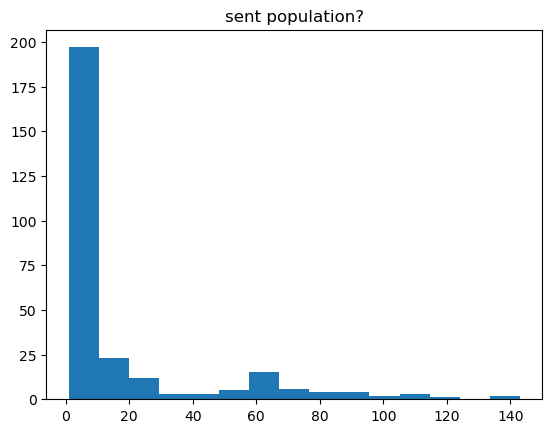

In [247]:
plt.hist(data_len, bins=15)
plt.title('sent population?')
plt.show()


In [250]:
# 가장 긴 문장 길이 기준
for idx, sent in enumerate(encoding_data):
    current_len = len(sent)
    if current_len < data_len_max:
        sent.extend([0]*(data_len_max - current_len))
        encoding_data[idx] = sent
        # print(sent)
        # break

In [255]:
for _ in encoding_data:
    print(_)

[3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[258, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[720, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

- imoprt torch
- torch.ToTensor()ㄱㄱ 해야함.

In [256]:
# 기준 길이를 100으로 정함
data_len = 100

In [263]:
# 임의의 기준 길이
for idx, sent in enumerate(encoding_data):
    current_len = len(sent)
    if current_len < data_len:
        sent.extend([0]*(data_len - current_len))
        encoding_data[idx] = sent
        # print(sent)
        # break
    else:
        # 앞을 자르는 경우[:100]
        # 뒤를 자르는 경우[:-42], [:len]
        sent = sent[current_len - data_len:]    # 앞을 잘라내는 경우, 길이 지정하는 파트는 다시 복습해둘 것!!!!
        # snet = sent[:data_len]                  # 뒤를 잘라내는 경우, 이 경우에는 길일르 계산하는 것은 쉬움. 위에가 난리... ㅇㅅㅇ
        # print(len(sent))
        encoding_data[idx] = sent

In [265]:
for _ in encoding_data[:5]:
    print(_)

[3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[258, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[720, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[721, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

- 만약에 내가 가지고 온 데이터가 1개가 아니라면?
- 이것을 믿을 수 없음. 이를 확률 값으로 나타냄.
    - 이 또한 모든 데이터를 커버할 수 없음 -> N-gram을 이용 -> count 기반의 방식 등등 여러 방법들이 algorithm 적으로 등장함.
- 단어가 많을수록 학습의 문제가 발생 할 수 있음.
    - sklearn에는 다양한 vectorization을 할 수 있는 모듈을 제공함.

- 문장이 길어기면 길어질수록 단어가 많을수록 또 빈도가 높다고 좋은 단어는 아니다. document의 기준과 나의 데이터는 다를 수 있음. 
- 많이 나오는데 모든 문서에 많이 나오면 필요없음.
- 여러 문제점들이 존재하니까 유사도 기반으로 크기를 줄여감.
    - 단어를 필요한 것만 들고가고 차원 축소를 진행하고 등드등 기법이 많다
- 또한 자연어를 처리하는 라이브러리는 종류가 다양함. 나의 데이터에 가장 잘 맞는 라이브러리를 이용하는 것이 성능을 높게 나옴.
    - 잘 찾아서 쓰면 됨. 특히 한국어는!!!!!!!
    - 만약 라이브러리에 등록되지 않은 단어라면... 상속 받아서 custom class로 만들어서라도 써야지.
- 속도차이가 많이 난다고 함. 라이브러리에 따라서.

- 형태소를 분석하는 것은 아시아권의 대부분의 나라에서 필요한 과정. 영어보다는 복잡하겠지만....
- 다음 시간에 배우는 것은 한국어, 한국어, 와~ 와~